In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

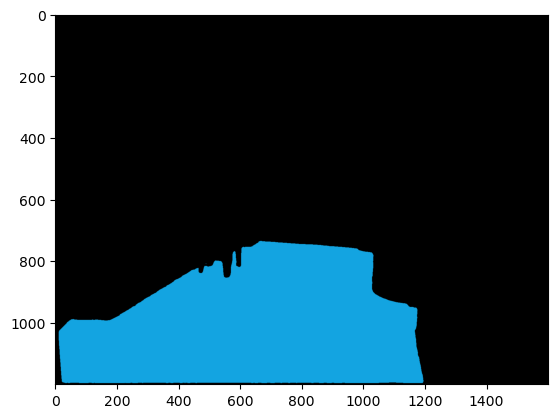

In [88]:
imge=cv2.imread("C:\\Users\\DAAI.DESKTOP-128VDS1\\Documents\\deva\\mfs\\inputs\\masks\\img6\\mask0.png")
plt.imshow(imge)

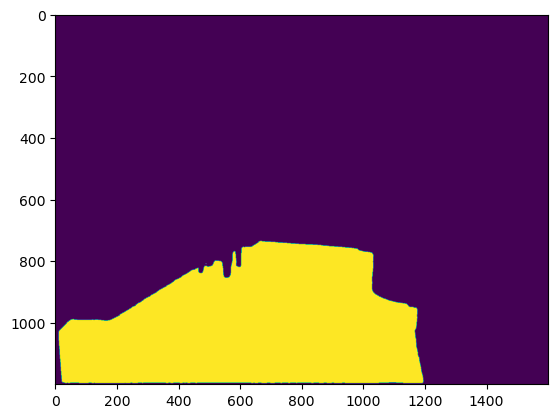

In [45]:
img=cv2.cvtColor(imge,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

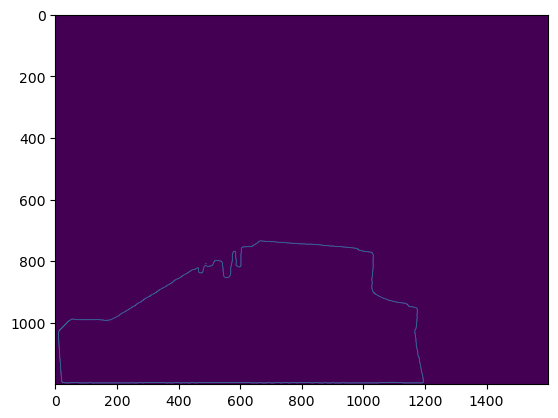

In [46]:
edge=cv2.Canny(img,30,20)
plt.imshow(edge)

In [47]:
contours, hierarchy = cv2.findContours(edge,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

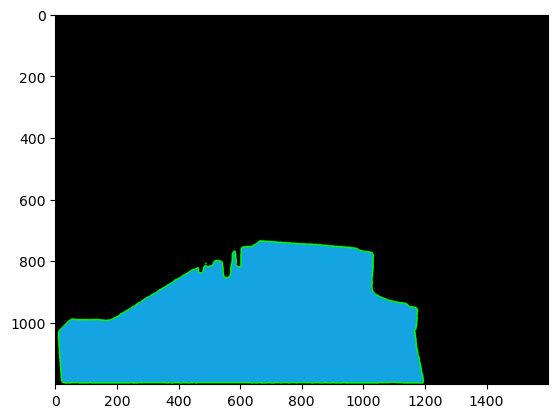

In [48]:
plt.imshow(cv2.drawContours(imge, contours, -1, (0, 255, 0), 3))

In [49]:
print(contours)

(array([[[489, 808]],

       [[489, 809]],

       [[489, 810]],

       [[489, 809]],

       [[490, 808]]], dtype=int32), array([[[666, 735]],

       [[665, 736]],

       [[664, 736]],

       ...,

       [[669, 735]],

       [[668, 735]],

       [[667, 735]]], dtype=int32))


In [64]:
list(contours)

[array([[[489, 808]],
 
        [[489, 809]],
 
        [[489, 810]],
 
        [[489, 809]],
 
        [[490, 808]]], dtype=int32),
 array([[[666, 735]],
 
        [[665, 736]],
 
        [[664, 736]],
 
        ...,
 
        [[669, 735]],
 
        [[668, 735]],
 
        [[667, 735]]], dtype=int32)]

In [66]:
contours=np.array(contours)

C:\Users\DAAI.DESKTOP-128VDS1\AppData\Local\Temp\ipykernel_18028\535423713.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contours=np.array(contours)


In [43]:
contours.shape

(1, 5818, 1, 2)

In [61]:
for c in contours:
    rect = cv2.boundingRect(c)
    if int(rect[3]/rect[2]) < 3: continue
    x,y,w,h = rect
    plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2))

In [60]:
plt.imshow(m)

NameError: name 'm' is not defined

In [67]:
(x, y), (w, h), angle = cv2.minAreaRect(contours)
elongation_factor = max(w, h)/min(w, h)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'minAreaRect'
> Overload resolution failed:
>  - points data type = 17 is not supported
>  - Expected Ptr<cv::UMat> for argument 'points'


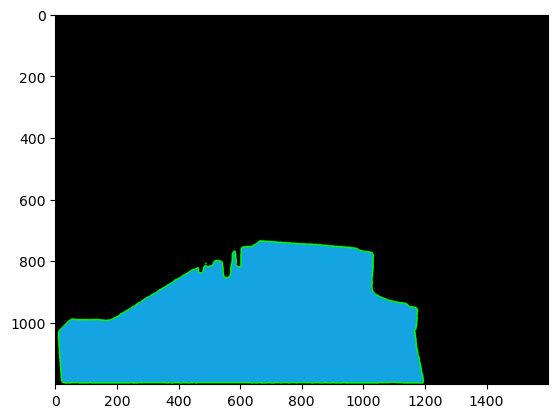

In [69]:
plt.imshow(imge)

In [71]:
lay=cv2.imread("C:\\Users\\DAAI.DESKTOP-128VDS1\\Documents\\deva\\mfs\\inputs\\products\\Wallpapers\\143_geometric wallpaper texture-seamless.jpg")

In [79]:
lay=cv2.resize(lay,(1400,1200))

In [80]:
lay.shape

(1200, 1400, 3)

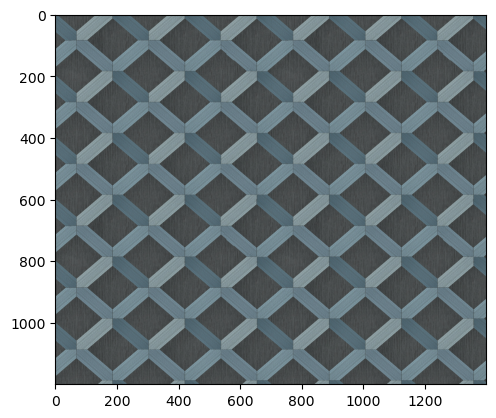

In [81]:
plt.imshow(lay)

In [107]:
result=cv2.warpPerspective(imge, lay,(1200,1600))

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3304: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 3 && M0.cols == 3 in function 'cv::warpPerspective'


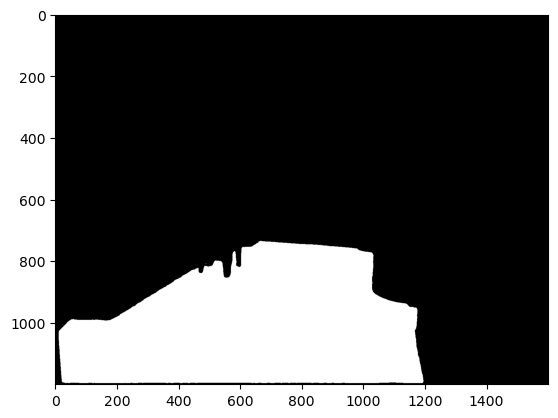

In [97]:
# p1=cv2.cvtColor(imge,cv2.COLOR_GRAY2RGB)
p2=cv2.cvtColor(imge,cv2.COLOR_RGB2GRAY)
plt.imshow(p2,cmap="gray")

In [104]:
imge.shape

(1200, 1600, 3)

In [101]:
lay=cv2.resize(lay,(1600,1200))

In [102]:
lay.shape

(1200, 1600, 3)

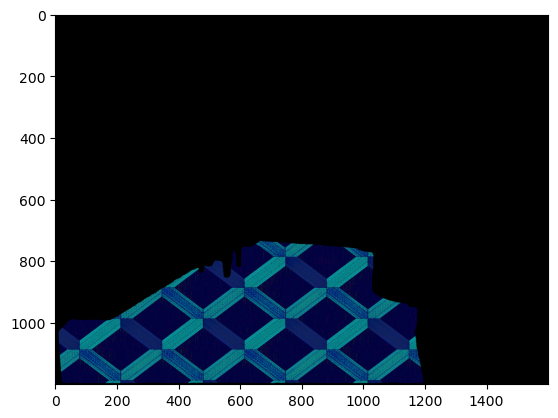

In [106]:
plt.imshow(cv2.bitwise_and(imge,lay))

In [123]:
def for_point_warp(cnt, orig):
    # we need to determine
    # the top-left, top-right, bottom-right, and bottom-left
    # points so that we can later warp the image -- we'll start
    # by reshaping our contour to be our finals and initializing
    # our output rectangle in top-left, top-right, bottom-right,
    # and bottom-left order
    pts = cnt.reshape(4, 2)
    rect = np.zeros((4, 2), dtype = "float32")

    # summing the (x, y) coordinates together by specifying axis=1
    # the top-left point has the smallest sum whereas the
    # bottom-right has the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # compute the difference between the points -- the top-right
    # will have the minumum difference and the bottom-left will
    # have the maximum difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # Notice how our points are now stored in an imposed order: 
    # top-left, top-right, bottom-right, and bottom-left. 
    # Keeping a consistent order is important when we apply our perspective transformation

    # now that we have our rectangle of points, let's compute
    # the width of our new image
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))

    # ...and now for the height of our new image
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

    # take the maximum of the width and height values to reach
    # our final dimensions
    maxWidth = max(int(widthA), int(widthB))
    maxHeight = max(int(heightA), int(heightB))

    # construct our destination points which will be used to
    # map the screen to a top-down, "birds eye" view
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # calculate the perspective transform matrix and warp
    # the perspective to grab the screen
    M = cv2.getPerspectiveTransform(rect, dst)
    warp = cv2.warpPerspective(orig, M, (maxWidth, maxHeight))
    return warp

def resize(img, width=None, height=None, interpolation = cv2.INTER_AREA):
    global ratio
    w, h, _ = img.shape

    if width is None and height is None:
        return img
    elif width is None:
        ratio = height/h
        width = int(w*ratio)
        print(width)
        resized = cv2.resize(img, (height, width), interpolation)
        return resized
    else:
        ratio = width/w
        height = int(h*ratio)
        print(height)
        resized = cv2.resize(img, (height, width), interpolation)
        return resized

#load an image
flat_object = imge.copy()
#resize the image
flat_object_resized = resize(flat_object, height=600)
#make a copy
flat_object_resized_copy = flat_object_resized.copy()
#convert to HSV color scheme
flat_object_resized_hsv = cv2.cvtColor(flat_object_resized_copy, cv2.COLOR_BGR2HSV)
# split HSV to three chanels
hue, saturation, value = cv2.split(flat_object_resized_hsv)
# threshold to find the contour
retval, thresholded = cv2.threshold(saturation, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# morphological operations
thresholded_open = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, (7,7))
thresholded_close = cv2.morphologyEx(thresholded_open, cv2.MORPH_CLOSE, (7,7))
# find edges
thresholded_edge = cv2.Canny(thresholded_close, 15, 150)
# The cv2.findContours method is destructive (meaning it manipulates the image you pass in) 
# so if you plan on using that image again later, be sure to clone it. 
cnts = cv2.findContours(thresholded_edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
# keep only 10 the largest ones
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
# the contour that we seek for
our_cnt = None
# loop over our 10 largest contours in the query image
for c in cnts:
    # approximate the contour
    # These methods are used to approximate the polygonal curves of a contour. 
    # In order to approximate a contour, you need to supply your level of approximation precision. 
    # In this case, we use 2% of the perimeter of the contour. The precision is an important value to consider. 
    # If you intend on applying this code to your own projects, you’ll likely have to play around with the precision value.
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    print(peri, len(approx))
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    our_cnt = approx
    if len(approx) == 4:
        our_cnt = approx
        break

print(our_cnt)
# draw a contour
cv2.drawContours(flat_object_resized_copy, [our_cnt], -1, (0,255,0), 3)
warped = for_point_warp(our_cnt/ratio, flat_object)
warped = resize(warped, height=800)

cv2.imshow("Original image", flat_object_resized)
cv2.imshow("Marked ROI", flat_object_resized_copy)
cv2.imshow("Warped ROI", warped)



450
537.4873691797256 7
1044.5584359169006 12
[[[174 312]]

 [[211 321]]

 [[249 277]]

 [[382 290]]

 [[387 340]]

 [[440 360]]

 [[448 449]]

 [[440 359]]

 [[386 338]]

 [[386 292]]

 [[249 277]]

 [[211 321]]]


ValueError: cannot reshape array of size 24 into shape (4,2)

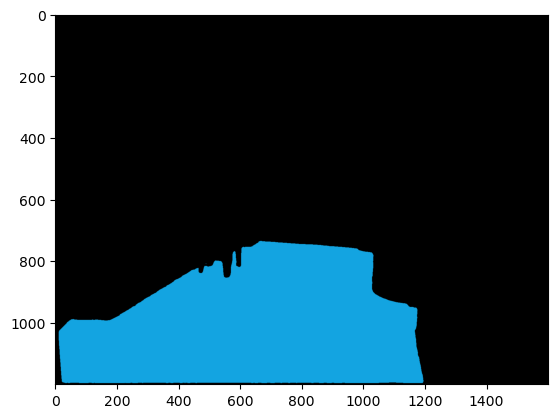

In [173]:
imge=cv2.imread("C:\\Users\\DAAI.DESKTOP-128VDS1\\Documents\\deva\\mfs\\inputs\\masks\\img6\\mask0.png")
plt.imshow(imge)

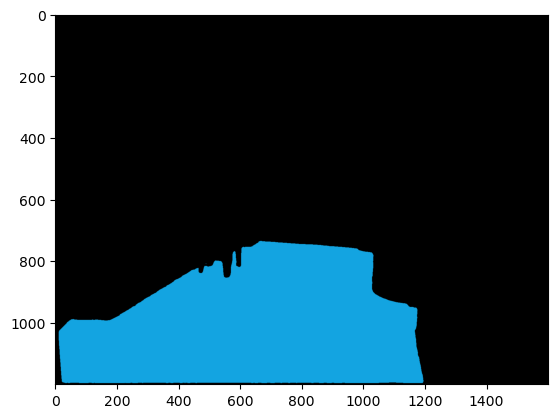

In [156]:
plt.imshow(imge)

In [154]:

contours[0]

array([[[489, 808]],

       [[489, 809]],

       [[489, 810]],

       [[489, 809]],

       [[490, 808]]], dtype=int32)

In [124]:
%pip install rdp


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rdp: filename=rdp-0.8-py3-none-any.whl size=4605 sha256=7f3713638e04ea8168fc3dc1c0dbebaa27ec8cc4ec287979e1dd2ff885aa5d18
  Stored in directory: c:\users\daai.desktop-128vds1\appdata\local\pip\cache\wheels\0a\f9\cb\61ba948d1a9b464e862fc7f91651bf446c47c520929ebdb074
Successfully built rdp
Note: you may need to restart the kernel to use updated packages.


In [191]:

from rdp import rdp
pp=rdp(contours[1], epsilon=100)


In [188]:
contours[1].shape

(3108, 1, 2)

In [193]:
pp.shape

(6, 1, 2)

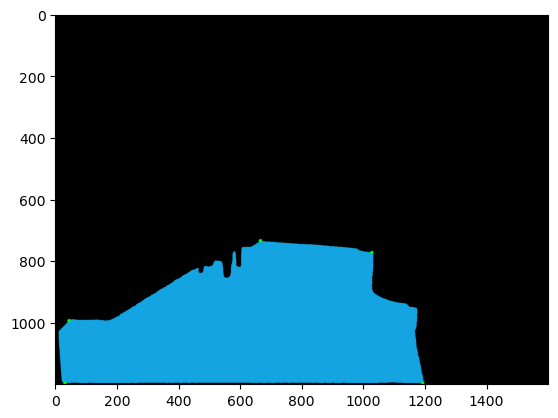

In [192]:
tmp = imge.copy()
for i in pp:
    tmp = cv2.circle(tmp, i[0], 3, (0, 255, 0), 3)
plt.imshow(tmp)